# 3.9. Hyperparameter Optimization 🔍

* ### Warm-up
      * What is the difference between model parameters and hyperparameters?
      * What hyperparameters have you already used or seen?
      * What are the challenges of hyperparameter optimatization?
      

#### ANSWERS: 
* Model paramaters are the paramaters that model learns during the training (m.fit) part. 
* The hyperparameters are the parameters that we define before training the model.


* Model parameters examples (slope, intercept).
* Model hyperparameters( strenght of the penalty, number of trees, alpha, child-number...)

* We have different techiques, computionally expensive and exhausting. You need some experience.

 ### Metrics Optimatization




* Classification problem: Accuracy, AUC/ROC, Confusion matrix(Recall, Precision, F-1 Score)
* Regression problem: Coefficient of determination, Mean squared log error, Mean Absolute error...

### How do I choose the right hyperparameters?


* Manually
* Random Search
* Grid Search
* Bonus: Bayesian Search

In [1]:
from sklearn.datasets import make_moons

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
sns.set() 
sns.set_style("darkgrid")

## 1. Load the dataset: make moons from sklearn 

In [12]:
X, y = make_moons(n_samples=200, noise = 0.3)

In [13]:
X.shape, y.shape


((200, 2), (200,))

In [14]:
y

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0])

In [15]:
X

array([[ 0.8473566 , -0.78905313],
       [ 1.19677198, -0.24891284],
       [-0.17622229,  1.08672473],
       [ 1.09499967,  0.02653515],
       [ 0.37200516, -0.0573478 ],
       [-1.13262041,  0.78460324],
       [-0.62551167,  1.40295394],
       [ 0.72724942, -0.30664167],
       [ 0.43322594,  0.11966924],
       [-0.24091226,  0.8291996 ],
       [ 1.34579253, -0.11949028],
       [-0.88146157,  0.28402515],
       [ 2.16853283, -0.26280308],
       [-0.826951  ,  0.62391031],
       [-0.23731657,  0.65323656],
       [ 1.23091199, -0.50356261],
       [ 0.7472017 ,  1.0166925 ],
       [ 0.44949745,  1.42543197],
       [ 0.96511984,  0.37121598],
       [ 1.75652402,  0.45179776],
       [ 0.83794493,  0.25265047],
       [-0.29999098,  0.7750514 ],
       [-0.21354823,  1.0137577 ],
       [ 0.19180969,  0.61184265],
       [-0.59914831,  0.56415211],
       [ 1.93348343,  0.21209607],
       [-0.29370224,  1.06573696],
       [ 0.3301882 , -0.1421448 ],
       [ 1.91889364,

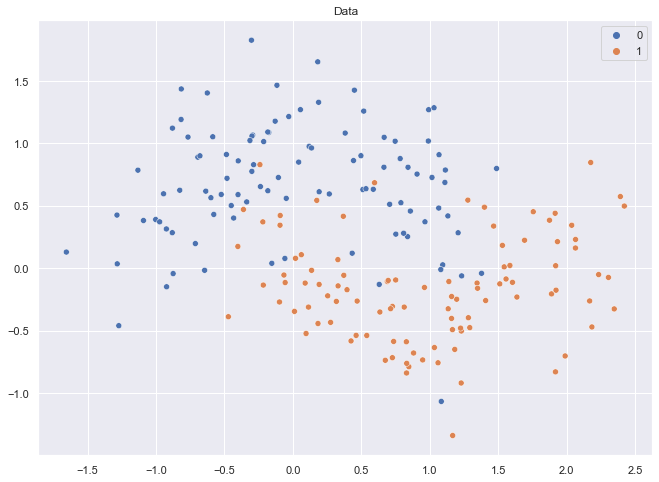

In [16]:
plt.figure(figsize=(11,8))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.title('Data')


plt.show()

## 2.  Train Test Split

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

## 3. Try some classifier: Random Forest  

In [18]:
from sklearn.ensemble import RandomForestClassifier


In [19]:
m = RandomForestClassifier() #initialise your model
m.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [20]:
m.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
training_score = m.score(Xtrain, ytrain)

In [22]:
training_score

1.0

In [28]:
prediction =m.predict(Xtest)


## 5. Hyperparameter Optimatisation with GridSearchCV

> Instead of trying out different hyperparameters and values manuall we can use a Grid Search. 
We provide a dictionary with parameters that will be "searched" for the best model. 

In [29]:
from sklearn.model_selection import GridSearchCV

### 5.1 Define a parameter grid for Grid Search

In [30]:

parameters = {
    'n_estimators': [2**i for i in range(3, 10)],  
    'max_depth': [2, 4, 8, 16, 32, None]       
}




In [33]:

rf = RandomForestClassifier()

In [34]:
cv_h = GridSearchCV(estimator=rf, param_grid=parameters, cv=5, scoring='accuracy')

In [35]:
cv_h.fit(Xtrain, ytrain)  

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [36]:
def print_results(results):
    print('BEST MODEL PARAMETERS: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    for mean, params in zip(means, results.cv_results_['params']):
        print('{}  for {}'.format(round(mean, 4), params))

In [37]:
print_results(cv_h)

BEST MODEL PARAMETERS: {'max_depth': None, 'n_estimators': 32}

0.8867  for {'max_depth': 2, 'n_estimators': 8}
0.8733  for {'max_depth': 2, 'n_estimators': 16}
0.8667  for {'max_depth': 2, 'n_estimators': 32}
0.8933  for {'max_depth': 2, 'n_estimators': 64}
0.8733  for {'max_depth': 2, 'n_estimators': 128}
0.8733  for {'max_depth': 2, 'n_estimators': 256}
0.8733  for {'max_depth': 2, 'n_estimators': 512}
0.8733  for {'max_depth': 4, 'n_estimators': 8}
0.8933  for {'max_depth': 4, 'n_estimators': 16}
0.88  for {'max_depth': 4, 'n_estimators': 32}
0.8933  for {'max_depth': 4, 'n_estimators': 64}
0.8867  for {'max_depth': 4, 'n_estimators': 128}
0.8867  for {'max_depth': 4, 'n_estimators': 256}
0.8867  for {'max_depth': 4, 'n_estimators': 512}
0.8733  for {'max_depth': 8, 'n_estimators': 8}
0.8933  for {'max_depth': 8, 'n_estimators': 16}
0.88  for {'max_depth': 8, 'n_estimators': 32}
0.8867  for {'max_depth': 8, 'n_estimators': 64}
0.8733  for {'max_depth': 8, 'n_estimators': 128}
0.873

### 5.2. Collect the results

In [38]:
results = pd.DataFrame(cv_h.cv_results_)

In [39]:
results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011911,0.004975,0.001009,0.000211,2,8,"{'max_depth': 2, 'n_estimators': 8}",0.9,0.866667,0.933333,0.833333,0.900000,0.886667,0.033993,6
1,0.011241,0.001302,0.000818,0.000053,2,16,"{'max_depth': 2, 'n_estimators': 16}",0.9,0.866667,0.900000,0.833333,0.866667,0.873333,0.024944,29
2,0.020368,0.000055,0.001354,0.000008,2,32,"{'max_depth': 2, 'n_estimators': 32}",0.9,0.866667,0.866667,0.833333,0.866667,0.866667,0.021082,39


In [40]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [41]:
results[['mean_fit_time','rank_test_score',
            'param_max_depth', 'param_n_estimators',
             'split1_test_score', 'split2_test_score', 
         'split3_test_score', 'split4_test_score','mean_test_score']].sort_values('mean_test_score')

,mean_fit_time,rank_test_score,param_max_depth,param_n_estimators,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score
23,0.020597,39,16,32,0.866667,0.866667,0.900000,0.866667,0.866667
2,0.020368,39,2,32,0.866667,0.866667,0.833333,0.866667,0.866667
38,0.040987,39,None,64,0.866667,0.833333,0.900000,0.866667,0.866667
35,0.005369,39,None,8,0.866667,0.866667,0.933333,0.866667,0.866667
18,0.081559,29,8,128,0.866667,0.866667,0.900000,0.866667,0.873333
14,0.005342,29,8,8,0.900000,0.866667,0.866667,0.866667,0.873333
33,0.162284,29,32,256,0.866667,0.866667,0.900000,0.866667,0.873333
19,0.162410,29,8,256,0.866667,0.866667,0.900000,0.866667,0.873333
20,0.324225,29,8,512,0.866667,0.866667,0.900000,0.900000,0.873333
7,0.005303,29,4,8,0.866667,0.900000,0.833333,0.900000,0.873333


## 6. Making predictions with the best model

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
rf_best = cv_h.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=32,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
cross_acc = cross_val_score(estimator=rf_best,  # estimator: # the model you want to evaluate 
                            X=Xtrain,           # the training input data 
                            y=ytrain,           # the training output data  
                            cv=5,               # number of cross validation datasets, k   
                            scoring='accuracy') # evaluation metric 

In [45]:
rf_best.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=32,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
cross_acc

array([0.8       , 0.86666667, 0.86666667, 0.9       , 0.86666667])

In [47]:
cross_acc.mean()

0.86

In [48]:
pred = rf_best.predict(Xtest)
pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0])

In [49]:
pred_train =rf_best.predict(Xtrain)

In [50]:
accuracy_score(ytest, pred), accuracy_score(ytrain, pred_train)

(0.92, 1.0)

## BONUS: Summary of Model Hyperparameters


### Random Forest
*HINT: Random Forest might actually be a good model for your regression problem too, check it out.*

Spend some time checking out the hyperparameters for RandomForestRegressor and try it on your data.

### The Impurity Parameter

Impurity could be Gini or Entropy. They both need to be minimised.

#### ENTROPY 
criterion aims to increase the information gain by decreasing the chaos. https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8


#### GINI CRITERION 
very similar to entropy, and gives the probability of classifying data wrongly on tree nodes.

It is faster but it needs to be multiplied by two since its top range is 0.5.

### Logistic Regression

#### Penalty
- In Sklearn Logistic Regression, there are two shrinkage penalties: L1, L2. For the moment, it's enough to know that we use them to decrease the variance (overfit to training and poor fit to test data).

- L1 reduces coefficients by a certain factor while L2 does the same with the square of a factor.

### C

- gives the inverse strength of the chosen regularisation (go smaller if you want stronger regularisation).




## What next? 👀 

* Optimize the hyperparameters of your model by running a GridSearchCV.
* Define a dictionary that contains the parameters you want to inspect.
* Initialize the GridSearchCV.
* Fit it on your complete training data.
* Inspect the result with pd.DataFrame(grid.cv_results_).
* Have a look at the columns 'mean_test_score', 'mean_train_score' and 'params'. 
* Plot the training and cross valdation test score.


### Course material
[3.9. Hyperparameter Optimatisation](https://spiced.space/ordinal-oregano/ds-course/chapters/project_bicycles/hyperparameter_optimization/README.html)